1. The prediction task is to determine whether
a person makes over 50K a year. Explain the
performance of the model using accuracy,
AUROC curve and confusion matrix. Feel
free to add any other metric you see fit.

In [188]:
import pandas as pd
import numpy as np

In [189]:
# reading dataset
df = pd.read_csv('/content/au_train.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [190]:
# printing information about all the features present in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [191]:
# printing data shape
df.shape

(32561, 15)

In [192]:
# checking for duplicates
df.duplicated().sum()

24

In [193]:
# dropping duplicates
df = df.drop_duplicates()
df.shape

(32537, 15)

In [194]:
# distribution of data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education-num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital-gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital-loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


In [195]:
# checking nulls in every column
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [196]:
# extracting numerical features
numeric_columns = list(df._get_numeric_data().columns)
numeric_columns

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [197]:
# extracting categorical features
categorical_columns = []
all_columns = list(df.columns)
for i in all_columns:
  if i not in numeric_columns:
    categorical_columns.append(i)
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'class']

In [198]:
for attribute in df.columns[:-1]:
    print("Attribute = {}, Unique values = {}".format(attribute,df[attribute].nunique()))

Attribute = age, Unique values = 73
Attribute = workclass, Unique values = 9
Attribute = fnlwgt, Unique values = 21648
Attribute = education, Unique values = 16
Attribute = education-num, Unique values = 16
Attribute = marital-status, Unique values = 7
Attribute = occupation, Unique values = 15
Attribute = relationship, Unique values = 6
Attribute = race, Unique values = 5
Attribute = sex, Unique values = 2
Attribute = capital-gain, Unique values = 119
Attribute = capital-loss, Unique values = 92
Attribute = hours-per-week, Unique values = 94
Attribute = native-country, Unique values = 42


In [199]:
# printing all unique records of workclass feature
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

We can see that there are some unknown workclasses in our dataset i.e **'?'** in workclass column

Checking if there is any unknown class in other columns as well

In [200]:
for attribute in df.columns[:-1]:
    if '?' in list(df[attribute].unique()):
      print(attribute)

There are unknown values '?' in three columns workclass, occupation and native-country

In [201]:
# trimming spaces from records of every categorical features
for c in categorical_columns:
  df[c] = df[c].str.replace(" ", "")

In [202]:
# checking percentage of missing values in categorical features
print('% of missing values :')
for c in categorical_columns:
    perc = len(df[df[c] == '?']) / df.shape[0] * 100
    print(c, f'{perc:.1f} %')

% of missing values :
workclass 5.6 %
education 0.0 %
marital-status 0.0 %
occupation 5.7 %
relationship 0.0 %
race 0.0 %
sex 0.0 %
native-country 1.8 %
class 0.0 %


In [203]:
# replacing ? with Null in all categorical columns
for c in categorical_columns:
  df[c]=df[c].replace('?',np.NaN)

In [204]:
# checking nulls in every column
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
class                0
dtype: int64

Imputing missing values

1. workclass column

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


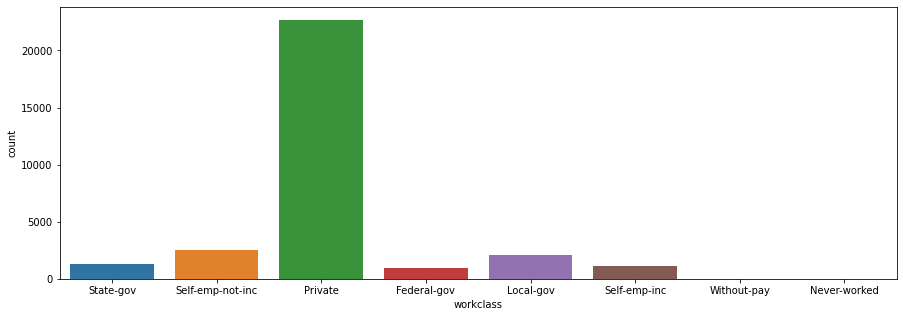

In [205]:
# Plotting every attribute of workclass column
plt.figure(figsize=(15,5))
sns.countplot(df.workclass)

From the above plot we can conclude that 'Private' is the most occuring attribute in comparison of any other attribute in workclass column. Thatswhy imputing null with 'Private' will be the most efficient approach.

In [206]:
df['workclass'] = df['workclass'].fillna('Private')

In [207]:
df.workclass.isna().sum()

0

2. Occupation

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


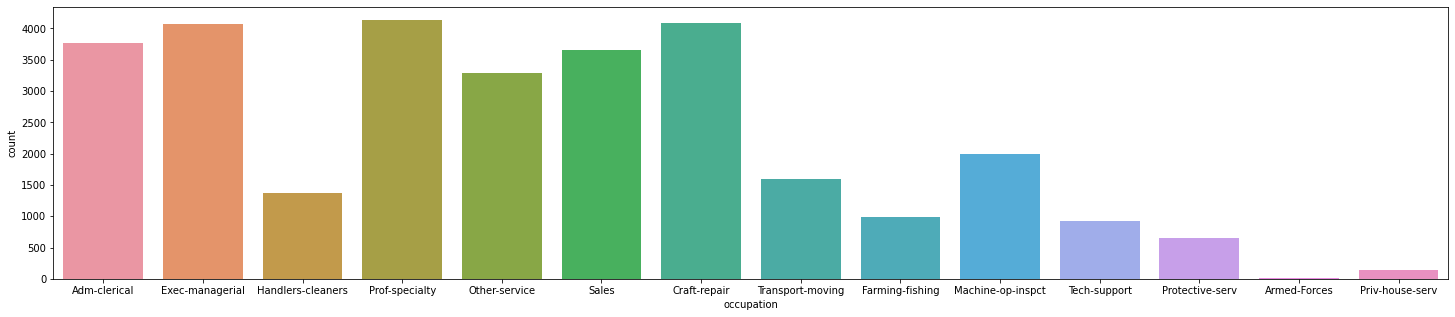

In [208]:
plt.figure(figsize=(25,5))
sns.countplot(df.occupation)

Computing mode of occupation column

In [209]:
df['occupation'].mode()[0]

'Prof-specialty'

Imputing nulls with mode of occupation column

In [210]:
df['occupation'] = df['occupation'].fillna(df.occupation.mode()[0])

In [211]:
# Verifying nulls are imputed or not
df.occupation.isna().sum()

0

3. native-country

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


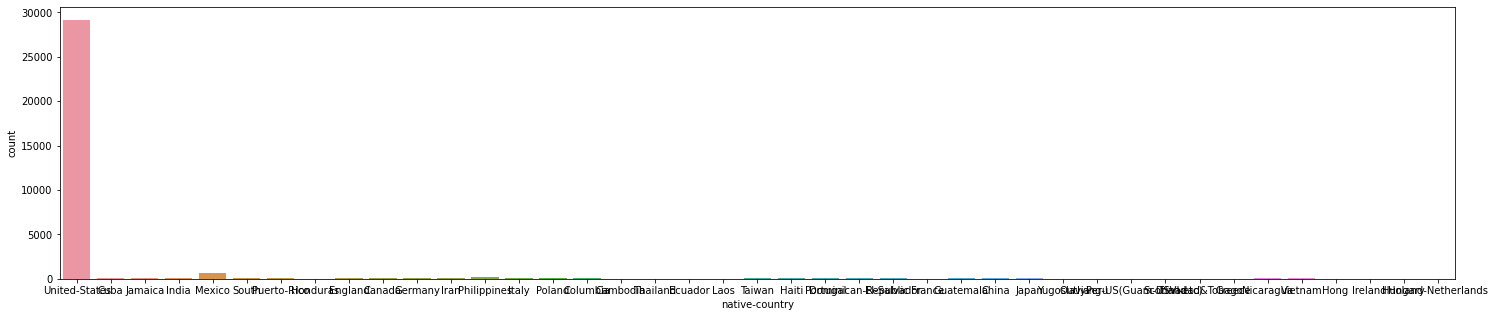

In [212]:
plt.figure(figsize=(25,5))
sns.countplot(df['native-country'])

Computing mode of native-country column

In [213]:
df['native-country'].mode()[0]

'United-States'

Imputing nulls in native-country column with mode of it

In [214]:
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])

In [215]:
# Verifying nulls are imputed or not
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [216]:
# printing value counts of all record in class feature
df['class'].value_counts()

<=50K    24698
>50K      7839
Name: class, dtype: int64

In [217]:
# Creating dummy variable of class column
df["class"] = pd.get_dummies(df["class"], prefix="class", drop_first=True)

In [218]:
# assigning target variable to y and dropping it
y = df["class"]
df = df.drop(columns="class")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [219]:
# final categorical features after removing target column
final_categorical = ['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex']

In [220]:
# Creating dummy variables of all final categorical columns
df2 = pd.get_dummies(df[final_categorical], drop_first=True)
df2.head()

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [221]:
# Concatinating numeric and categorical column after preprocessing
X = pd.concat([df[numeric_columns], df2], axis=1)
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,77516,13,2174,0,40,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,38,215646,9,0,0,40,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


Random Forest Model

In [222]:
# Importing needful libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [223]:
# assigning training data
X_train = X
y_train = y

# Training RandomForestClassifier model with our dataset
rf = RandomForestClassifier().fit(X_train, y_train)

In [224]:
# Reading Testing Data
test_df = pd.read_csv('/content/au_test.csv')
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [225]:
# trimming spaces from records of every categorical features
for c in categorical_columns:
  test_df[c] = test_df[c].str.replace(" ", "")

In [226]:
# replacing ? with NA in all categorical columns
for c in categorical_columns:
  test_df[c]=test_df[c].replace('?',np.NaN)

In [227]:
# checking nulls in every column
test_df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
class               0
dtype: int64

In [228]:
# Imputing missing values
test_df['workclass'] = test_df['workclass'].fillna(test_df['workclass'].mode()[0])
test_df['occupation'] = test_df['occupation'].fillna(test_df['occupation'].mode()[0])
test_df['native-country'] = test_df['native-country'].fillna(test_df['native-country'].mode()[0])

In [229]:
# Verifying nulls are imputed or not
test_df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [230]:
# Creating dummy variable of target column
test_df["class"] = pd.get_dummies(test_df["class"], prefix="class", drop_first=True)

In [231]:
# Assigning target column to y_test and dropping it afterwards
y_test = test_df["class"]
test_df = test_df.drop(columns="class")

In [232]:
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States


In [233]:
# Creating dummies of final categorical columns
test_dummies = pd.get_dummies(test_df[final_categorical], drop_first=True)
test_dummies.head()

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [234]:
# Concatinating numeric and categorical columns and assigning it to testing data
X_test = pd.concat([test_df[numeric_columns], test_dummies], axis=1)
X_test.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,28,336951,12,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,18,103497,10,0,0,30,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [235]:
# Computing predictions
predictions = rf.predict(X_test)

In [236]:
print(f'Accuracy score of the RandomForrest: on test = {rf.score(X_test, y_test)*100:.2f}%')

Accuracy score of the RandomForrest: on test = 85.22%


In [237]:
# Computing predictions
y_pred = rf.predict(X_test)

# Computing classification report
cr = classification_report(y_test, y_pred)

# Computing confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing classification report and confusion matrix
print(cr)
print(cm)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     12435
           1       0.72      0.61      0.66      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.77      0.78     16281
weighted avg       0.85      0.85      0.85     16281

[[11523   912]
 [ 1495  2351]]


In [238]:
# Computing and printing ROC_AUC_Score
from sklearn import metrics
print("ROC_AUC_Score : ",metrics.roc_auc_score(y_test, y_pred))

ROC_AUC_Score :  0.7689715381136355


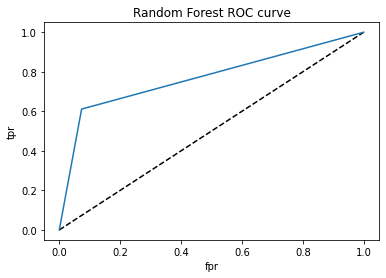

In [239]:
# Plotting AUC_ROC Curve

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
y_pred = rf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(f'Random Forest ROC curve')
plt.show()

Hyperparameter Tuning

In [240]:
rfc = RandomForestClassifier()
param_grid = { 
    'n_estimators': [50, 100, 150, 200, 250],
    'max_features': [1, 2, 3, 4, 5],
    'max_depth' : [4, 6, 8],
    'bootstrap': [True,False],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
}

In [241]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rfc, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 6, 8],
                                        'max_features': [1, 2, 3, 4, 5],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250]},
                   verbose=2)

In [242]:
params = rf_RandomGrid.best_params_

In [243]:
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test)*100:.3f}')

Test Accuracy - : 85.032


In [244]:
rf_Model = RandomForestClassifier()
rf_Model.set_params(**params)
rf_Model.fit(X_train,y_train)
print(f'Accuracy score of the RandomForest: on test = {rf_Model.score(X_test, y_test)*100:.2f}%')

Accuracy score of the RandomForest: on test = 84.52%


In [245]:
# indexes of columns which are the most important
np.argsort(rf.feature_importances_)[-16:]

array([10, 42, 21,  8, 49, 56, 47, 36, 31,  4,  2,  5, 29,  3,  0,  1])

In [246]:
# most important features
[list(X.columns)[i] for i in np.argsort(rf.feature_importances_)[-16:]][::-1]

['fnlwgt',
 'age',
 'capital-gain',
 'marital-status_Married-civ-spouse',
 'hours-per-week',
 'education-num',
 'capital-loss',
 'marital-status_Never-married',
 'occupation_Exec-managerial',
 'relationship_Not-in-family',
 'sex_Male',
 'relationship_Own-child',
 'workclass_Private',
 'education_Bachelors',
 'occupation_Prof-specialty',
 'workclass_Self-emp-not-inc']

Feature Importance Plot

fnlwgt - 0.176
age - 0.159
capital-gain - 0.103
marital-status_Married-civ-spouse - 0.091
hours-per-week - 0.089
education-num - 0.071
capital-loss - 0.033
marital-status_Never-married - 0.027
occupation_Exec-managerial - 0.017
relationship_Not-in-family - 0.017
sex_Male - 0.016
relationship_Own-child - 0.012
workclass_Private - 0.012
education_Bachelors - 0.011
occupation_Prof-specialty - 0.010
workclass_Self-emp-not-inc - 0.009
education_Masters - 0.008
relationship_Wife - 0.008
occupation_Sales - 0.008
occupation_Craft-repair - 0.007
relationship_Unmarried - 0.007
occupation_Other-service - 0.007
race_White - 0.007
education_HS-grad - 0.007
workclass_Local-gov - 0.006
workclass_Self-emp-inc - 0.006
education_Prof-school - 0.006
occupation_Tech-support - 0.005
occupation_Transport-moving - 0.005
workclass_State-gov - 0.005
race_Black - 0.005
education_Some-college - 0.005
occupation_Machine-op-inspct - 0.005
occupation_Farming-fishing - 0.004
education_Doctorate - 0.004
race_Asian-Pa

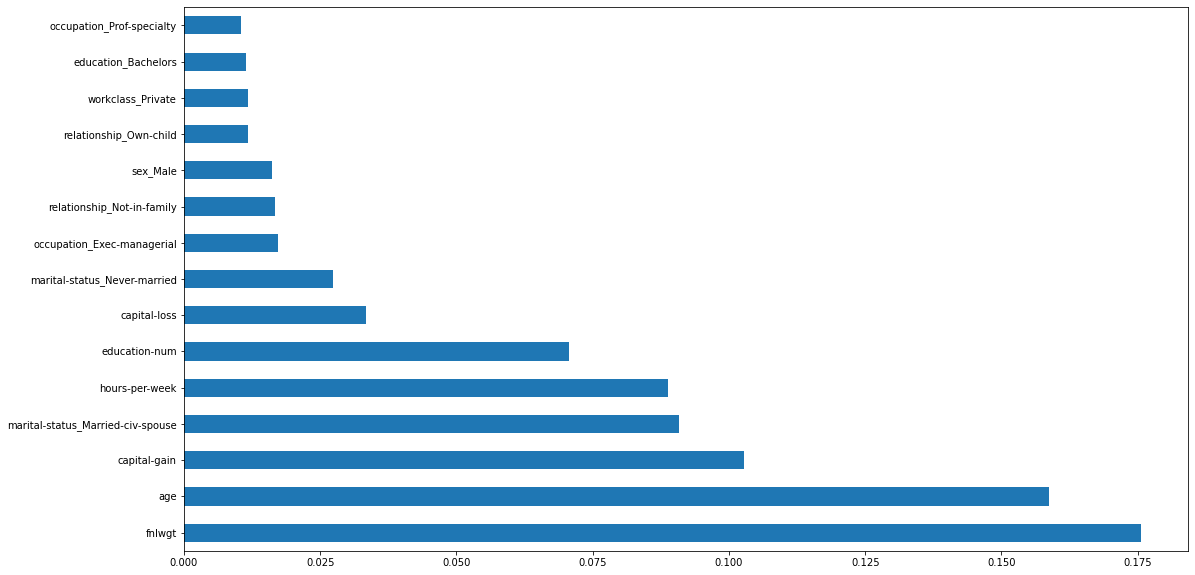

In [247]:
# Feature importances
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
num_features = len(importances)

# Print values
for i in indices:
    print ("{0} - {1:.3f}".format(features[i], importances[i]))

# plot of important features
(pd.Series(rf.feature_importances_, index=X_train.columns)
   .nlargest(15)
   .plot(kind='barh',figsize=(18,10)))

Experimenting with **Lazy Predict Classifier** to find the most generalized model for the dataset

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [1:18:17<00:00, 161.98s/it]   


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.79,0.80,0.80,0.80,0.17
XGBClassifier,0.87,0.80,0.80,0.87,8.15
LGBMClassifier,0.87,0.80,0.80,0.87,0.77
BernoulliNB,0.82,0.78,0.78,0.82,0.29
AdaBoostClassifier,0.86,0.78,0.78,0.86,4.01
RandomForestClassifier,0.85,0.77,0.77,0.85,332.97
LogisticRegression,0.85,0.77,0.77,0.85,0.92
CalibratedClassifierCV,0.85,0.76,0.76,0.85,53.59
LinearSVC,0.85,0.76,0.76,0.85,11.79


From the above report we can conclude that LGBMClassifier will be more genralized as compared to Random Forest for this dataset

LightGBM model

In [268]:
# Importing needful libraries
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from pandas import DataFrame
from numpy import argmax

In [269]:
params = {
    'boosting': 'gbdt',
    'objective': 'multiclass',
    'num_leaves': 10,
    'num_class': 3
} 

lgb_train = lgb.Dataset(X_train, y_train)

In [270]:
# Training LGBMClassifier on our dataset
model = lgb.train(params,
                 train_set=lgb_train)

In [271]:
# prediction
y_pred = model.predict(X_test)

y_pred = argmax(y_pred, axis=1)
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [272]:
print("Classification Report:\n",cr)
print("Confusion Matrix:\n",cm) 

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92     12435
           1       0.78      0.64      0.70      3846

    accuracy                           0.87     16281
   macro avg       0.84      0.79      0.81     16281
weighted avg       0.87      0.87      0.87     16281

Confusion Matrix:
 [[11737   698]
 [ 1393  2453]]


[[11737   698]
 [ 1393  2453]]


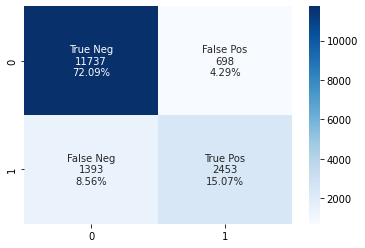

In [273]:
# Plotting Confusion Matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

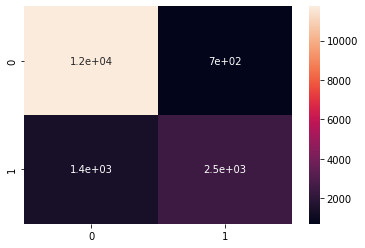

In [274]:
# Plotting Heatmap of Confusion Matrix
sns.heatmap(cf_matrix, annot=True)

In [275]:
# Computing and printing ROC_AUC_Score
from sklearn import metrics
print("ROC_AUC_Score : ",metrics.roc_auc_score(y_test, y_pred))

ROC_AUC_Score :  0.7908368132071483


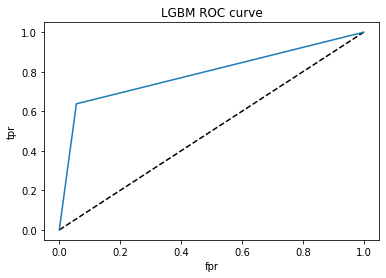

In [276]:
# Plotting AUC_ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
y_pred = model.predict(X_test)
y_pred = argmax(y_pred, axis=1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='LGBM')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(f'LGBM ROC curve')
plt.show()

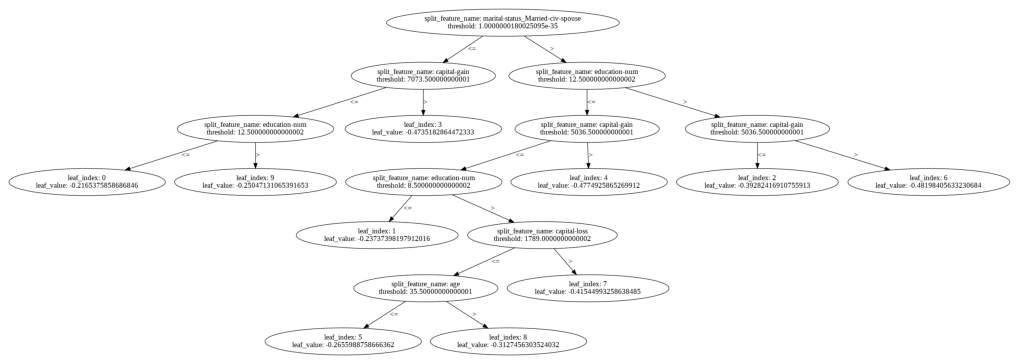

In [277]:
# Plotting Trees created by LGBMClassifier
lgb.plot_tree(model,figsize=(18,10))

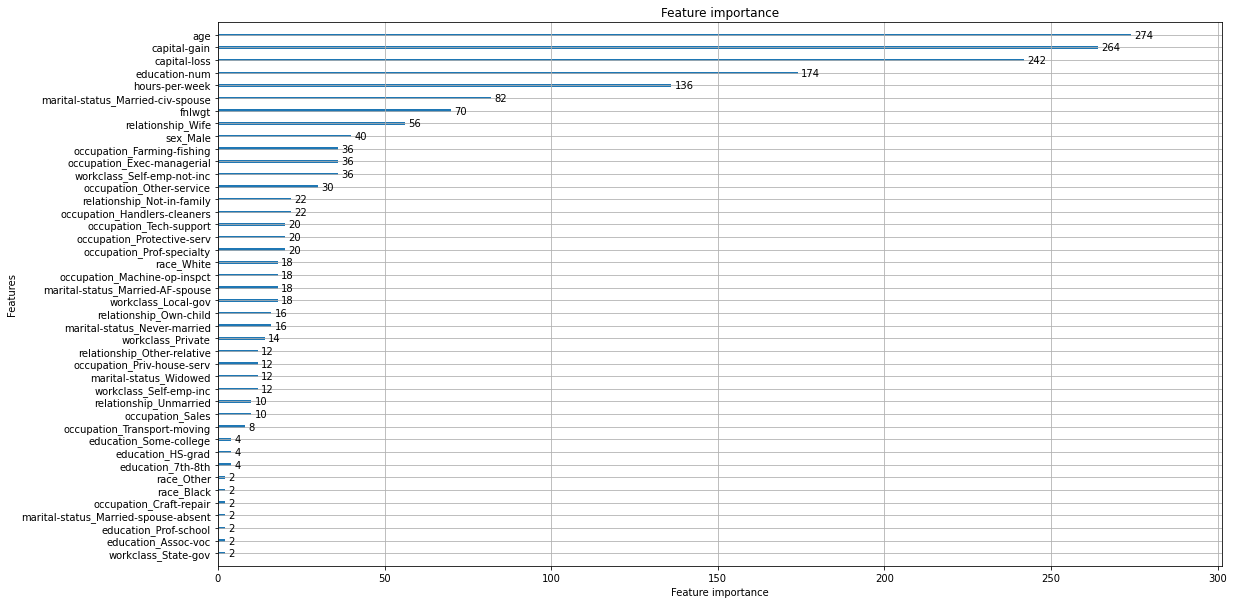

In [258]:
# Plotting Feature Importance Graph
lgb.plot_importance(model,figsize=(18,10))

Hyperparameter Tuning of LightGBM using Optuna

In [259]:
# Installing Optuna Library
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 8.5 MB/s 
     |████████████████████████████████| 210 kB 58.6 MB/s 
     |████████████████████████████████| 81 kB 8.8 MB/s 
     |████████████████████████████████| 78 kB 7.4 MB/s 
     |████████████████████████████████| 147 kB 50.6 MB/s 
     |████████████████████████████████| 50 kB 5.4 MB/s 
     |████████████████████████████████| 112 kB 48.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=cc1cdd85e2e9e04ba2118b7428de414f6e43f6dfef085ea4a3aa789d82ed282a
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 5.1.0
    Uninstalling importlib-metadata-5.1.0:
      Successfully uninstalled importlib-metadata-5.1.0


In [260]:
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from functools import partial
import optuna
import lightgbm as lgb


def optimize_ensemble_classification(trial, x, y):


    learning_rate = trial.suggest_uniform('learning_rate',0.1,0.5),
    max_depth = trial.suggest_int('max_depth',4,32),
    num_leaves= trial.suggest_int('num_leaves',8,32),
    feature_fraction = trial.suggest_uniform('feature_fraction',0.3,0.8),
    subsample = trial.suggest_uniform('subsample',0.1, 0.2)

    model = lgb.LGBMClassifier(max_depth = max_depth,
                      num_leaves= num_leaves,
                      feature_fraction = feature_fraction,
                      subsample = subsample)

    kf = StratifiedKFold(n_splits= 10)
    mean_metric = []

    for idx in kf.split(x, y):
        train_idx, test_idx = idx[0], idx[1]
        x_train = x[train_idx]
        y_train = y[train_idx]
        x_test = x[test_idx]
        y_test = y[test_idx]
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        result = precision_score(y_test, pred)
        mean_metric.append(pred)
        
        return -np.mean(mean_metric)

optimization_function = partial(optimize_ensemble_classification, x = X_train.values, y = y_train.values)
study = optuna.create_study(direction= 'minimize')
study.optimize(optimization_function, n_trials=15)

[I 2022-12-25 10:18:54,636] A new study created in memory with name: no-name-6ae553ad-ed08-41f6-9cd7-c006c821ab9a
<ipython-input-260-d31b8ea37964>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_uniform('learning_rate',0.1,0.5),
<ipython-input-260-d31b8ea37964>:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  feature_fraction = trial.suggest_uniform('feature_fraction',0.3,0.8),
<ipython-input-260-d31b8ea37964>:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` i

In [261]:
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from pandas import DataFrame
from numpy import argmax

In [262]:
# Extracting best parameters
study.best_params

{'learning_rate': 0.19537490146982955,
 'max_depth': 28,
 'num_leaves': 22,
 'feature_fraction': 0.6211633363607567,
 'subsample': 0.14667528532911442}

In [263]:
model_lgb = lgb.LGBMClassifier(**study.best_params)
model_lgb.fit(X_train.values, y_train.values)

# prediction
y_pred = model_lgb.predict(X_test)

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [264]:
print(cr)
print(cm)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     12435
           1       0.77      0.66      0.71      3846

    accuracy                           0.87     16281
   macro avg       0.84      0.80      0.82     16281
weighted avg       0.87      0.87      0.87     16281

[[11690   745]
 [ 1300  2546]]


In [265]:
# Computing AUC_ROC_Score
from sklearn import metrics
print("ROC_AUC_Score : ",metrics.roc_auc_score(y_test, y_pred))

ROC_AUC_Score :  0.8010374697255682


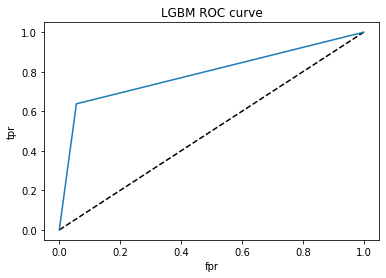

In [266]:
# Plotting AUC_ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
y_pred = model.predict(X_test)
y_pred = argmax(y_pred, axis=1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='LGBM')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(f'LGBM ROC curve')
plt.show()

2. Perform a segmentation study on the
dataset to display useful information using
any visualization library

In [46]:
df = pd.read_csv('/content/au_train.csv')
# dropping duplicates
df = df.drop_duplicates()

# trimming spaces from records of every categorical features
for c in categorical_columns:
  df[c] = df[c].str.replace(" ", "")

In [47]:
# Calculating ratio of all the people earning more than 50k
print(f"Ratio above 50k : {(df['class'] == '>50K').astype('int').sum() / df.shape[0] * 100 :.2f}%")

Ratio above 50k : 24.09%


<Figure size 1152x720 with 0 Axes>

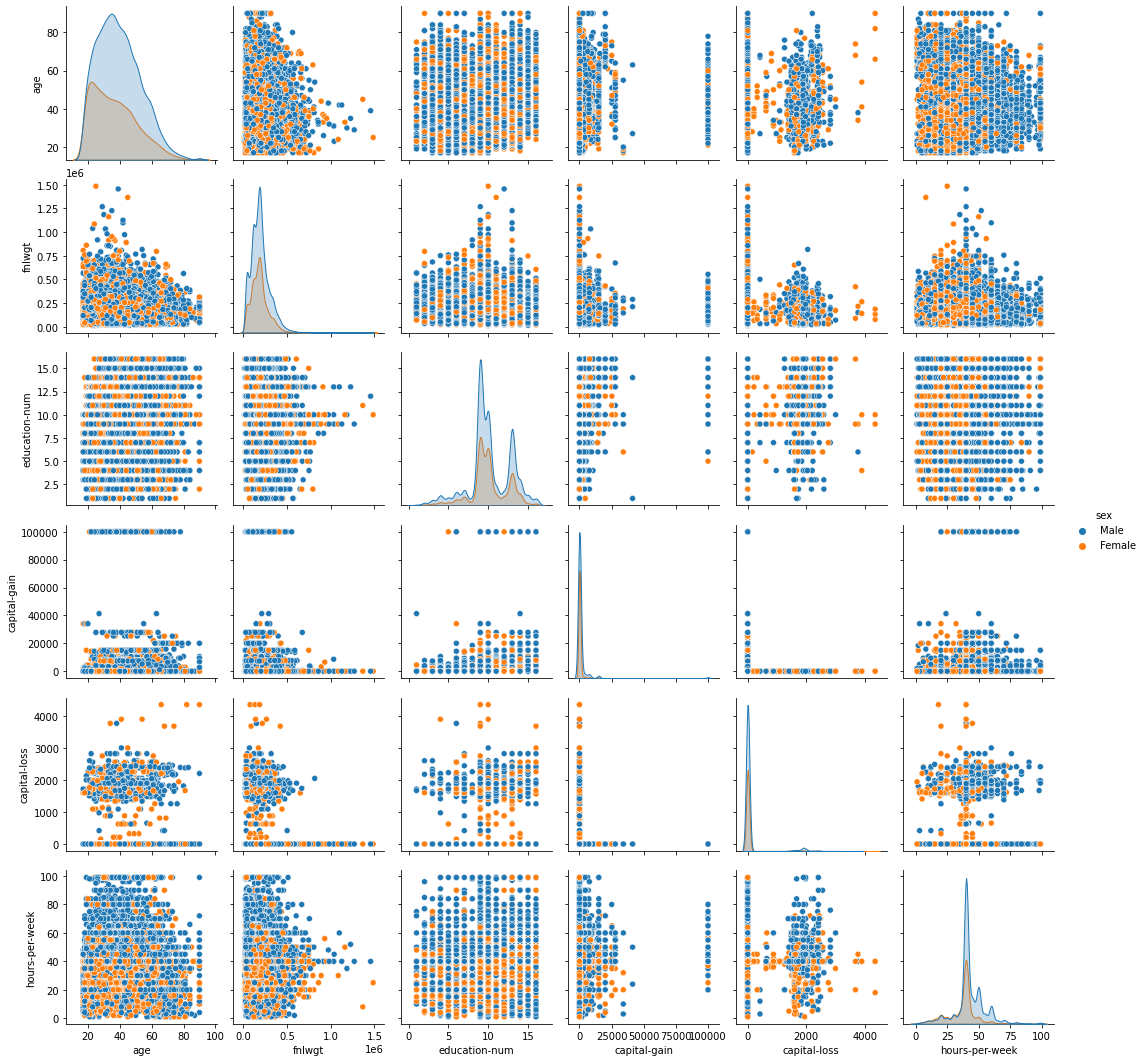

In [54]:
# Plotting pairwise relationship in data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue="sex")
plt.show()

<ipython-input-65-3f9029ffbc84>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 3, i+1)


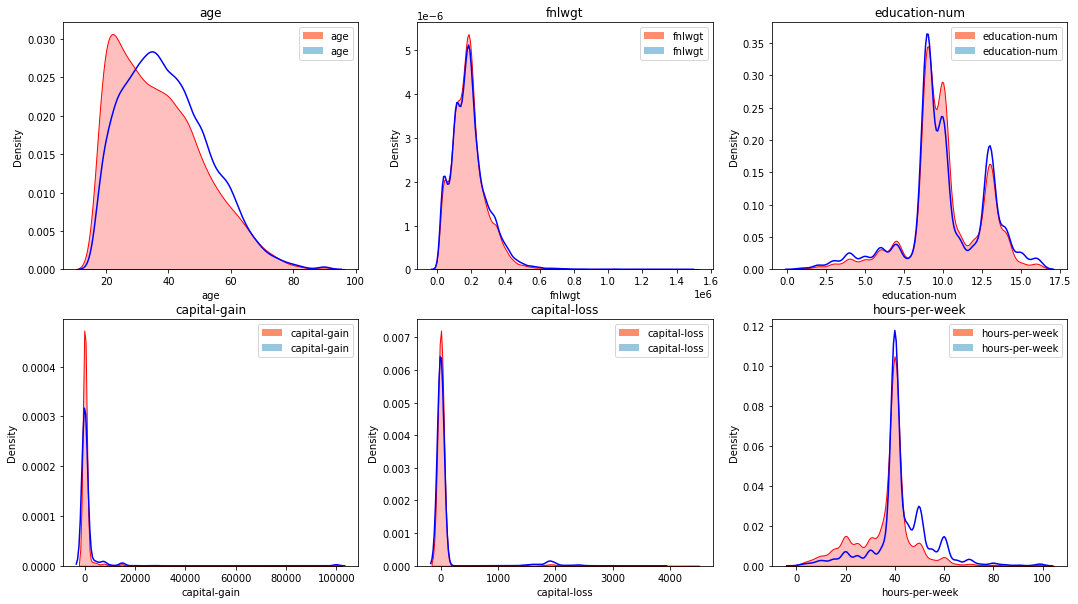

In [65]:
# distribution of numerical values for both Male and Female
import matplotlib.patches as  mpatches
plt.figure(figsize=(18,10))
plt.subplot(231)

i=0
for c in numeric_columns:
    plt.subplot(2, 3, i+1)
    i += 1
    sns.kdeplot(df[df['sex'] == 'Female'][c], shade=True, color='red')
    sns.kdeplot(df[df['sex'] == 'Male'][c], shade=False,color='blue')
    plt.title(c)
    handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label=c),
           mpatches.Patch(facecolor=plt.cm.Blues(100), label=c)]
    plt.legend(handles=handles)


plt.show()

From the above plot we can conlcude that male & female values are fluctuating alot in case of two features -> **capital-gain, hours-per-week**

<ipython-input-78-8f66c2bb4190>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(5, 2, i+1)


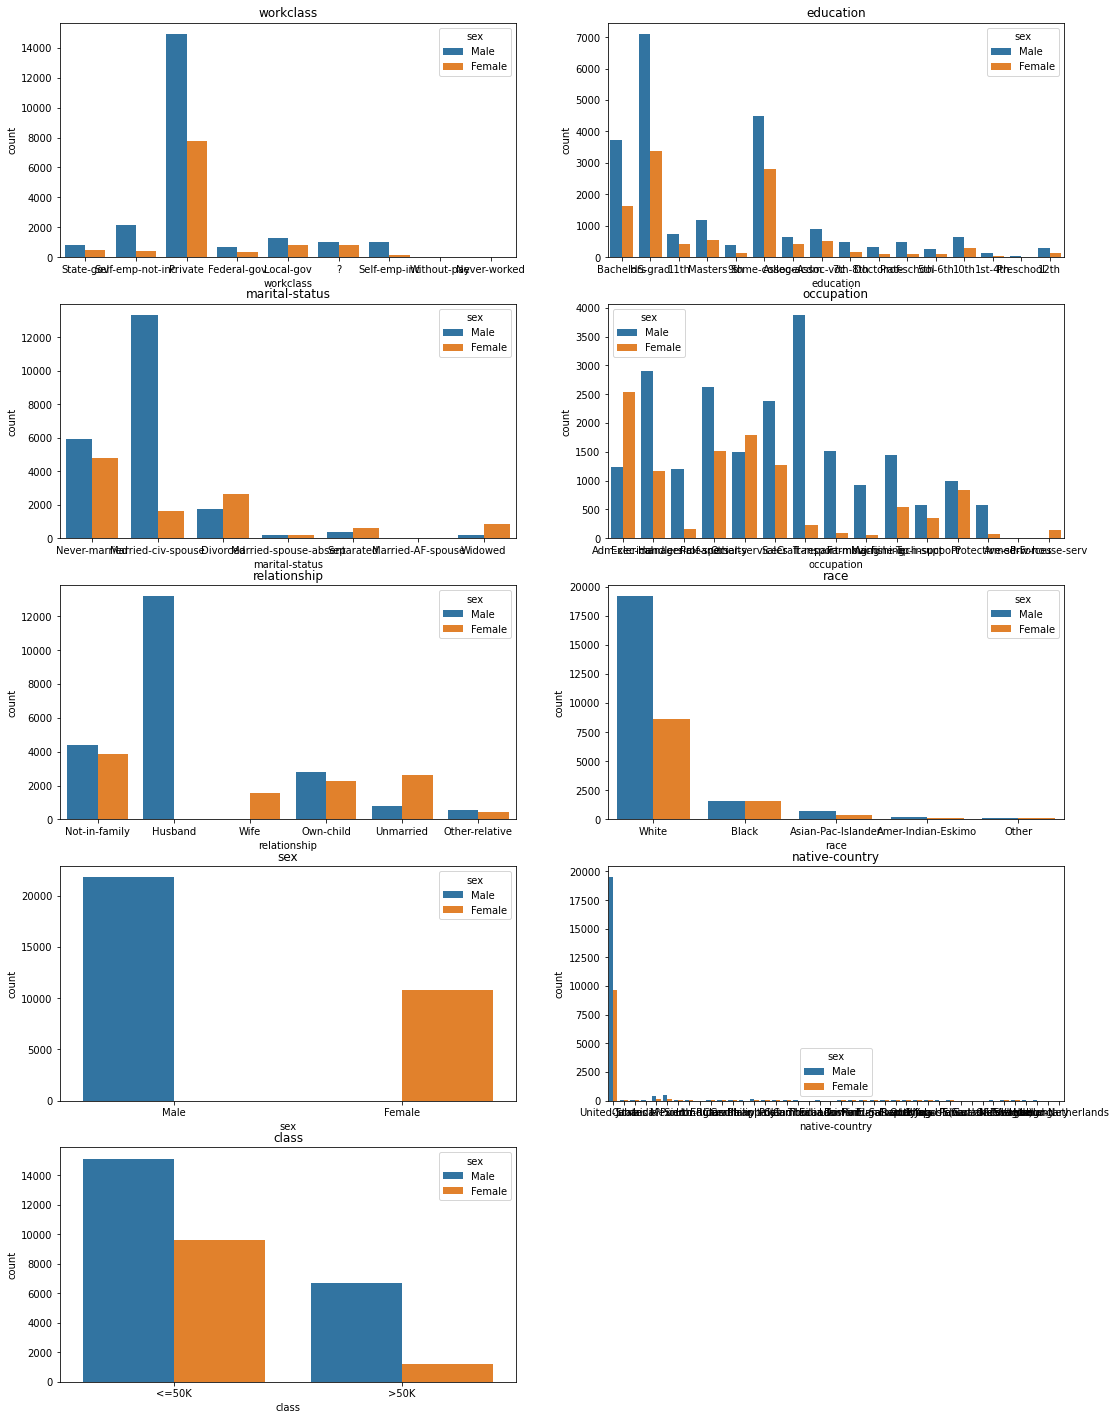

In [78]:
plt.figure(figsize=(18,25))
plt.subplot(521)

i=0
for c in categorical_columns:
    plt.subplot(5, 2, i+1)
    i += 1
    sns.countplot(x=c, data=df, hue='sex')
    plt.title(c)

plt.show()

From the above plot we can observe that the ratio of males in terms class is higher as compared to females for both less than 50k and greater than 50k

Normalizing Count

In [66]:
# nb of female / male
nb_female = (df.sex == 'Female').astype('int').sum()
nb_male = (df.sex == 'Male').astype('int').sum()
nb_female, nb_male

(10762, 21775)

In [69]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Since "class" is a reserved keyword thatswhy renaming it

In [72]:
df.rename(columns = {'class':'CLASS'}, inplace = True)

In [73]:
# nb of people earning more or less than 50k per gender
nb_male_above = len(df[(df.CLASS == '>50K') & (df.sex == 'Male')])
nb_male_below = len(df[(df.CLASS == '<=50K') & (df.sex == 'Male')])
nb_female_above = len(df[(df.CLASS == '>50K') & (df.sex == 'Female')])
nb_female_below = len(df[(df.CLASS == '<=50K') & (df.sex == 'Female')])
nb_male_above, nb_male_below, nb_female_above, nb_female_below

(6660, 15115, 1179, 9583)

In [74]:
print(f'Among Males   : {nb_male_above/nb_male*100:.0f}% earn >50K // {nb_male_below/nb_male*100:.0f}% earn <=50K')
print(f'Among Females : {nb_female_above/nb_female*100:.0f}% earn >50K // {nb_female_below/nb_female*100:.0f}% earn <=50K')

Among Males   : 31% earn >50K // 69% earn <=50K
Among Females : 11% earn >50K // 89% earn <=50K


In [75]:
# normalization
nb_male_above /= nb_male 
nb_male_below /= nb_male
nb_female_above /= nb_female
nb_female_below /= nb_female
nb_male_above, nb_male_below, nb_female_above, nb_female_below

(0.3058553386911596,
 0.6941446613088404,
 0.1095521278572756,
 0.8904478721427244)

In [76]:
print(f'Among people earning >50K  : {nb_male_above / (nb_male_above + nb_female_above) *100 :.0f}% are Females and {nb_female_above / (nb_male_above + nb_female_above) *100 :.0f}% are Males')
print(f'Among people earning =<50K : {nb_male_below / (nb_male_below + nb_female_below) *100 :.0f}% are Females and {nb_female_below / (nb_male_below + nb_female_below) *100 :.0f}% are Males')

Among people earning >50K  : 74% are Females and 26% are Males
Among people earning =<50K : 44% are Females and 56% are Males


In [77]:
df["native-country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

Since United-States is the most occuring attribute in native-country column thatswhy doing EDA on it specifically

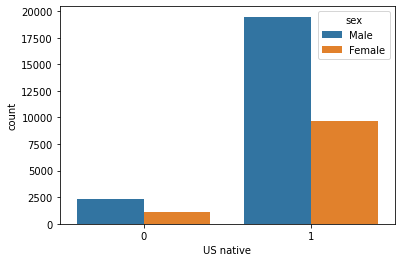

In [79]:
df['US native'] = (df['native-country'] == 'United-States').astype('int')
plt.figure(figsize=(6,4))
sns.countplot(x='US native', data=df, hue='sex')
plt.show()

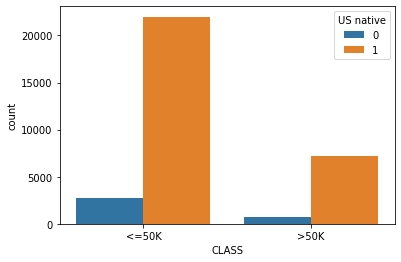

In [80]:
plt.figure(figsize=(6,4))
sns.countplot(x='CLASS', data=df, hue='US native')
plt.show()

In [81]:
# nb of people earning more or less than 50k per origin
nb_native_above = len(df[(df.CLASS == '>50K') & (df['US native'] == 1)])
nb_native_below = len(df[(df.CLASS == '<=50K') & (df['US native'] == 1)])
nb_foreign_above = len(df[(df.CLASS == '>50K') & (df['US native'] == 0)])
nb_foreign_below = len(df[(df.CLASS == '<=50K') & (df['US native'] == 0)])
nb_native_above, nb_native_below, nb_foreign_above, nb_foreign_below

(7169, 21984, 670, 2714)

In [83]:
nb_native = (df['US native'] == 1).astype('int').sum()
nb_foreign = df.shape[0] - nb_native
nb_native, nb_foreign

(29153, 3384)

In [84]:
print(f'Among natives    : {nb_native_above/nb_native*100:.0f}% earn >50K // {nb_native_below/nb_native*100:.0f}% earn <=50K')
print(f'Among foreigners : {nb_foreign_above/nb_foreign*100:.0f}% earn >50K // {nb_foreign_below/nb_foreign*100:.0f}% earn <=50K')

Among natives    : 25% earn >50K // 75% earn <=50K
Among foreigners : 20% earn >50K // 80% earn <=50K


In [85]:
# normalization
nb_native_above /= nb_native
nb_native_below /= nb_native
nb_foreign_above /= nb_foreign
nb_foreign_below /= nb_foreign
nb_native_above, nb_native_below, nb_foreign_above, nb_foreign_below

(0.24590951188556923,
 0.7540904881144308,
 0.1979905437352246,
 0.8020094562647754)

In [86]:
print(f'Among people earning >50K  : {nb_native_above / (nb_native_above + nb_foreign_above) *100 :.0f}% are natives and {nb_foreign_above / (nb_native_above + nb_foreign_above) *100 :.0f}% are foreigners')
print(f'Among people earning =<50K : {nb_native_below / (nb_native_below + nb_foreign_below) *100 :.0f}% are natives and {nb_foreign_below / (nb_native_below + nb_foreign_below) *100 :.0f}% are foreigners')

Among people earning >50K  : 55% are natives and 45% are foreigners
Among people earning =<50K : 48% are natives and 52% are foreigners


Heatmap of Correlation Matrix

<ipython-input-79-b52a2f8d50db>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


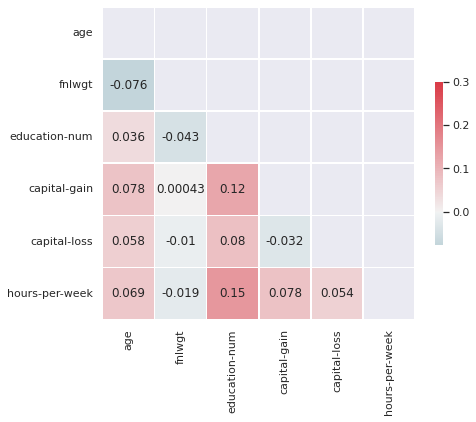

In [79]:
sns.set(style="darkgrid")

# Computing correlation matrix
corr = df[numeric_columns].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(7, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})